<a href="https://colab.research.google.com/github/ske0318/Intern_project_1/blob/main/Intern_proj_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **비만과 콜레스테롤 수치와의 관계를 실제 데이터를 바탕으로 살펴보자**<br/>

**Goal**<br/>
건강검진 데이터를 기반으로, 비만인의 LDL 콜레스테롤 수치 분포를 파이로 표현<br/>
<br/>
**개발환경**<br/>
언어 : 파이썬<br/>
라이브러리 : pandas, matplotlib<br/>

### 요구사항
아래의 링크에서 데이터 다운로드 (csv)<br/>
https://www.data.go.kr/data/15007122/fileData.do<br/>
+) 데이터의 한글로 되어있는 부분은 인코딩 문제로 인해 영어로 바꿔서 실행
<br/>
<br/>
비만도는 BMI로 계산하고 다음과 같이 분류<br/>
저체중 : 20미만<br/>
정상 : 20 ~ 24<br/>
과체중 : 25 ~ 59<br/>
비만 : **30이상**<br/>
<br/>
LDL 콜레스테롤 수치는 다음과 같이 분류<br/>
정상 : 130미만<br/>
경계 : 130~159<br/>
높은 : 160이상<br/>

### 데이터 파일 읽기 및 생김새 살펴보기



In [ ]:
#Pandas module import
import pandas as pd

In [ ]:
#csv 파일 읽기
csv_data = pd.read_csv('/content/data_20191231.csv', encoding='CP949')

#상위 5개 행 출력
csv_data.head(5)

,year,code_p,code_city,code_sex,code_age,height,weight,waist,vision_L,vision_R,hear_L,hear_R,SBP,DBP,pre_bs,cholesterol_total,triglycerides,HDL_cholesterol,LDL_cholesterol,hemoglobin,urine_protein,serum_creatinine,(혈청지오티)AST,ALT,Gamma_GTP,smoking,drinking,oral_exam,dental_caries,missing_teeth,dental_wear,wisdom_tooth,tartar,release_date
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,1.0,1.0,112.0,70.0,93.0,NaN,NaN,NaN,NaN,15.5,1.0,1.0,18.0,32.0,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,1.0,1.0,114.0,76.0,89.0,NaN,NaN,NaN,NaN,14.0,1.0,0.5,15.0,8.0,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,1.0,1.0,109.0,73.0,100.0,232.0,114.0,57.0,152.0,15.6,1.0,1.0,30.0,21.0,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,1.0,1.0,131.0,85.0,85.0,NaN,NaN,NaN,NaN,14.5,1.0,0.7,17.0,19.0,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,1.0,1.0,112.0,66.0,91.0,NaN,NaN,NaN,NaN,14.9,1.0,0.9,19.0,24.0,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


### 필요한 컬럼 추출 후 결측치 제거

In [ ]:
#필요한 data 컬럼 가져오기
using_data = csv_data.loc[:,['height','weight','cholesterol_total']]

#잘 가져왔는지 확인
using_data.head(5)

,height,weight,cholesterol_total
0,165,65,NaN
1,155,45,NaN
2,160,70,232.0
3,170,60,NaN
4,170,70,NaN


In [ ]:
#결측치 제거
data = using_data.dropna(how='any')

#data 확인
data.head(5)

,height,weight,cholesterol_total
2,160,70,232.0
5,170,110,215.0
6,175,70,148.0
10,170,75,193.0
12,150,65,252.0


### BMI 지수 계산

In [ ]:
#BMI 계산 - 체중(kg/m^2)
BMI_data = data['weight']/((data['height']/100)**2)

#BMI 계산 확인
BMI_data.head(5)

2     27.343750
5     38.062284
6     22.857143
10    25.951557
12    28.888889
dtype: float64

In [ ]:
#BMI 지수 병합
data = data.copy() #SettingWithCopyWarning 해결
data['BMI'] = BMI_data.values

#병합 확인
data.head(5)

,height,weight,cholesterol_total,BMI
2,160,70,232.0,27.343750
5,170,110,215.0,38.062284
6,175,70,148.0,22.857143
10,170,75,193.0,25.951557
12,150,65,252.0,28.888889


**SettingWithCopyWarning 해결 방안 참고자료**</br>

https://velog.io/@jonsyou/%EC%98%A4%EB%A5%98-%EB%85%B8%ED%8A%B8-Pandas-Try-using-.locrowindexercolindexer-value-instead

### 비만인에 따른 콜레스테롤 수치 선택 및 분류

*   필터링 (BMI 지수 비만인 경우만 분리)
*   카운팅 (콜레스테롤 수치에 따라 행의 수 카운트)

In [ ]:
#비만인의 콜레스테롤 수치 선택 (필터링)
obesity_data = data[data.BMI >= 30].loc[:,['cholesterol_total', 'BMI']]

#선택된 수치 확인
obesity_data.head(5)

,cholesterol_total,BMI
5,215.0,38.062284
98,155.0,34.602076
112,333.0,31.141869
132,238.0,31.217482
177,257.0,33.057851


In [ ]:
#비만인의 콜레스테롤 수치 카운팅
normal = len(obesity_data[obesity_data.cholesterol_total < 130])
warning = len(obesity_data[(obesity_data.cholesterol_total >= 130) & (obesity_data.cholesterol_total < 160)])
high = len(obesity_data[obesity_data.cholesterol_total >= 160])

#카운팅 수치 확인
print("normal : {}, warning : {}, high : {}".format(normal,warning,high))

normal : 759, warning : 2293, high : 14613


### 콜레스테롤 수치의 비율화 및 자료 시각화

In [ ]:
#수치의 비율화
total = normal + warning + high
percent_n = normal / total * 100
percent_w = warning / total * 100
percent_h = high / total * 100

#비율 확인
print("normal : {}, warning : {}, high : {}".format(percent_n,percent_w,percent_h))

normal : 4.2966317577129916, warning : 12.98046985564676, high : 82.72289838664025


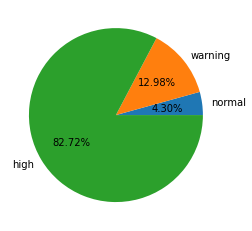

In [ ]:
#Matplotlib import
import matplotlib.pyplot as plt

#수치에 따른 그래프 그리기
ratio = [percent_n, percent_w, percent_h]
labels = ['normal', 'warning', 'high']
plt.pie(ratio, labels=labels, autopct='%.2f%%')
plt.show()

### 참고자료</br>
파이썬</br>
https://dojang.io/course/view.php?id=7
</br>
http://tcpschool.com/python2018/intro
</br>
</br>
판다스</br>
https://dandyrilla.github.io/2017-08-12/pandas-10min/
</br>
</br>
matplotlib</br>
https://wikidocs.net/92114